<a href="https://colab.research.google.com/github/ZenoZoldyck/hand_on_tensorflow/blob/main/Boston_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np

tf.__version__

'2.5.0'

In [2]:
# loading the dataset
(train_data, train_label), (test_data, test_label) = tf.keras.datasets.boston_housing.load_data()

57344/57026 [==============================] - 0s 0us/step


In [3]:
train_data[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [4]:
train_label[0]

15.2

In [9]:
train_data = pd.DataFrame(train_data)
test_data = pd.DataFrame(test_data)
train_data[:5]

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65


In [23]:
# data preprocessing

from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import make_column_transformer

ct = make_column_transformer((MinMaxScaler(), [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]))
ct.fit(train_data)
train_data_norm = ct.transform(train_data)
test_data_norm = ct.transform(test_data

In [24]:
train_data_norm[:5]

array([[1.37816304e-02, 0.00000000e+00, 2.81524927e-01, 0.00000000e+00,
        3.14814815e-01, 4.99806352e-01, 9.14521112e-01, 2.97191228e-01,
        1.30434783e-01, 2.27533461e-01, 8.93617021e-01, 1.00000000e+00,
        4.68818985e-01],
       [1.73654275e-04, 8.25000000e-01, 5.75513196e-02, 0.00000000e+00,
        6.17283951e-02, 7.84082107e-01, 1.31822863e-01, 5.36536996e-01,
        4.34782609e-02, 3.05927342e-01, 2.23404255e-01, 9.96167230e-01,
        3.80794702e-02],
       [5.49837765e-02, 0.00000000e+00, 6.46627566e-01, 0.00000000e+00,
        5.06172840e-01, 2.72850503e-01, 1.00000000e+00, 2.11779933e-02,
        1.00000000e+00, 9.13957935e-01, 8.08510638e-01, 9.46089061e-01,
        4.22185430e-02],
       [3.74171574e-04, 0.00000000e+00, 1.73387097e-01, 0.00000000e+00,
        2.67489712e-01, 4.79473277e-01, 3.25437693e-01, 5.06821005e-01,
        1.73913043e-01, 6.88336520e-02, 8.08510638e-01, 1.00000000e+00,
        1.73289183e-01],
       [4.14386307e-02, 0.00000000e+

In [16]:
train_label.max(), test_label.max()

(50.0, 50.0)

In [20]:
train_data_norm.shape

(404, 13)

In [70]:
# time to build a model

model_2 = tf.keras.Sequential([
   tf.keras.layers.Dense(8, activation = "relu"),
   tf.keras.layers.Dense(8, activation = "relu"),
   tf.keras.layers.Dense(16, activation = "relu"),
   tf.keras.layers.Dense(1)                          
])

model_2.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(lr = 0.01),
              metrics = ["mse"])

history = model_2.fit(train_data_norm, train_label, epochs = 100, validation_data = (test_data_norm, test_label))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
13/13 [==============================] - 0s 12ms/step - loss: 22.4896 - mse: 589.3652 - val_loss: 23.0377 - val_mse: 613.1005
Epoch 2/100
13/13 [==============================] - 0s 3ms/step - loss: 22.2592 - mse: 579.4788 - val_loss: 22.8332 - val_mse: 604.2076
Epoch 3/100
13/13 [==============================] - 0s 3ms/step - loss: 22.0652 - mse: 571.3361 - val_loss: 22.6499 - val_mse: 596.2333
Epoch 4/100
13/13 [==============================] - 0s 5ms/step - loss: 21.8830 - mse: 563.5362 - val_loss: 22.4652 - val_mse: 588.1838
Epoch 5/100
13/13 [==============================] - 0s 3ms/step - loss: 21.6921 - mse: 555.5024 - val_loss: 22.2627 - val_mse: 579.4268
Epoch 6/100
13/13 [==============================] - 0s 3ms/step - loss: 21.4759 - mse: 546.5705 - val_loss: 22.0223 - val_mse: 569.1767
Epoch 7/100
13/13 [==============================] - 0s 3ms/step - loss: 21.2065 - mse: 535.4185 - val_loss: 21.7035 - val_mse: 555.8333
Epoch 8/100
13/13 [=====================

In [71]:
model_1.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_73 (Dense)             (None, 8)                 112       
_________________________________________________________________
dense_74 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_75 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_76 (Dense)             (None, 1)                 9         
Total params: 265
Trainable params: 265
Non-trainable params: 0
_________________________________________________________________


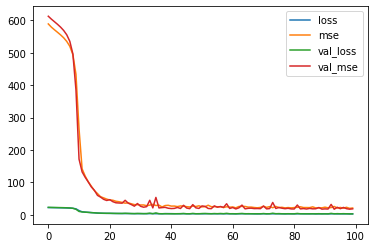

In [72]:
pd.DataFrame(history.history).plot()